## There is need to change the runtime type from CPU to GPU. This is because of the implentation of Neural Network.

# Data & imports

In [ ]:
# Installation of the needed libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install meteostat
!pip install sklearn
!pip install pmdarima
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ed00f1fccb45cdf07fcf7d0bb4cdfc707f85b67e455d301e6b9d2482ca72b0f8
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

In [ ]:
# This provides the python version of the python interpreter
!python --version

Python 3.10.11


In [ ]:
# Importing each library and printing out the version
import numpy as np
print('numpy: {}'.format(np.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import meteostat
from meteostat import Point, Hourly
print('meteostat: {}'.format(meteostat.__version__))
import datetime
import xgboost as xgb
print('xgboost: {}'.format(xgb.__version__))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
print('statsmodels: {}'.format(sm.__version__))
from prophet import Prophet
%matplotlib inline

numpy: 1.22.4
pandas: 1.5.3
matplotlib: 3.7.1
seaborn: 0.12.2
meteostat: 1.6.5
xgboost: 1.7.5
statsmodels: 0.13.5


In [ ]:
# Neural Network Library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Function to define the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_actual, y_pred): 
    """Calculates MAPE given y_actual and y_pred"""
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

In [ ]:
# Handle warnings
import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [ ]:
# Load the dataset directecly from URL
url = 'https://docs.google.com/spreadsheets/d/17Ri4N--VInGN6PYM75uHeC7bUX-ytBX9cFKyDtG1-6A/export?format=csv'
df = pd.read_csv(url, index_col= 0)
# index_col= 0 selects the first column as the index of the dataframe df

#<center>OR

In [ ]:
# # Load the dataset by uploading to Google Colab
# df = pd.read_csv('/content/historic_demand_2009_2023.csv', index_col= 0)

<a id='overview'></a>
# Overview

In [ ]:
# Take an overview look at the data first 5 rows
df.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,is_holiday
0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,NaN,NaN,1
1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,NaN,NaN,1
2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,NaN,NaN,1
3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,NaN,NaN,1
4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,NaN,NaN,1


In [ ]:
# Take an overview look at the data last 5 rows
df.tail()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,is_holiday
246667,2023-01-26,44,33657,35245,30497,913,6545,0,13080,0,9,988,613,1003,-451,-528,236,1095.0,83.0,0
246668,2023-01-26,45,31880,33471,28865,883,6545,0,13080,0,12,288,253,998,-451,-528,352,1095.0,7.0,0
246669,2023-01-26,46,30015,31612,27121,852,6545,0,13080,0,17,246,234,998,-451,-529,356,1095.0,33.0,0
246670,2023-01-26,47,27993,29744,25237,837,6545,0,13080,0,178,485,458,1003,-451,-522,500,1095.0,720.0,0
246671,2023-01-26,48,27077,28921,24426,821,6545,0,13080,0,366,498,466,1003,-451,-427,505,1095.0,768.0,0


In [ ]:
# Dispaly the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246672 entries, 0 to 246671
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   settlement_date            246672 non-null  object 
 1   settlement_period          246672 non-null  int64  
 2   nd                         246672 non-null  int64  
 3   tsd                        246672 non-null  int64  
 4   england_wales_demand       246672 non-null  int64  
 5   embedded_wind_generation   246672 non-null  int64  
 6   embedded_wind_capacity     246672 non-null  int64  
 7   embedded_solar_generation  246672 non-null  int64  
 8   embedded_solar_capacity    246672 non-null  int64  
 9   non_bm_stor                246672 non-null  int64  
 10  pump_storage_pumping       246672 non-null  int64  
 11  ifa_flow                   246672 non-null  int64  
 12  ifa2_flow                  246672 non-null  int64  
 13  britned_flow               24

In [ ]:
# Display the statistical summary of the dataframe
df.describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,is_holiday
count,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,246672.000000,71376.000000,71376.000000,246672.000000
mean,24.500227,31889.204223,33271.487935,29006.171333,1201.548068,4169.690277,789.179680,7663.458650,7.533421,322.510175,924.541865,5.331294,539.101365,-107.283016,-23.926822,144.995768,131.460127,-79.364114,0.022767
std,13.853820,7787.631871,7721.565128,7061.111616,921.594525,1916.869742,1587.879578,5486.625653,41.577431,546.264852,1092.813842,298.069088,508.589605,221.216126,250.557726,384.245233,443.460288,325.845024,0.149160
min,1.000000,13367.000000,0.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,-1455.000000,-1028.000000,0.000000
25%,12.750000,25672.000000,27276.000000,23342.750000,514.000000,2085.000000,0.000000,1784.000000,0.000000,8.000000,216.000000,0.000000,0.000000,-251.000000,-124.000000,0.000000,0.000000,0.000000,0.000000
50%,24.500000,31328.000000,32523.500000,28470.000000,961.000000,4126.000000,0.000000,9140.000000,0.000000,12.000000,1264.500000,0.000000,761.000000,-119.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.250000,37634.000000,38776.000000,34258.000000,1632.000000,6182.000000,711.000000,13080.000000,0.000000,478.000000,1902.000000,0.000000,994.000000,44.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9680.000000,13861.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1401.000000,1002.000000,1.000000


In [ ]:
# This shows the number of record and features respectively that is in the dataframe.
shape = df.shape
print(f"This data has {shape[0]} number of records/rows and {shape[1]} number of attribites/columns")

This data has 246672 number of records/rows and 20 number of attribites/columns


<a id='clean'></a>
# Data Cleaning

In [ ]:
# checked for duplicates records so it can be removed
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


We need to check for missing values

In [ ]:
# Check for missing values
df.isna().sum()

settlement_date                   0
settlement_period                 0
nd                                0
tsd                               0
england_wales_demand              0
embedded_wind_generation          0
embedded_wind_capacity            0
embedded_solar_generation         0
embedded_solar_capacity           0
non_bm_stor                       0
pump_storage_pumping              0
ifa_flow                          0
ifa2_flow                         0
britned_flow                      0
moyle_flow                        0
east_west_flow                    0
nemo_flow                         0
nsl_flow                     175296
eleclink_flow                175296
is_holiday                        0
dtype: int64

In [ ]:
# Print the count of the missing values present in these columns (`nsl_flow` and `eleclink_flow`)
print(df["nsl_flow"].isna().value_counts(), "\n")
print(df["eleclink_flow"].isna().value_counts())

True     175296
False     71376
Name: nsl_flow, dtype: int64 

True     175296
False     71376
Name: eleclink_flow, dtype: int64


Over half of the records in the nsl_flow and eleclink_flow column are missing. The column will be dropped because they are not a major feature in predicting the electricity demand.
From description of the dataset above, it shows the max number of the settlement period is 50. This an abnormalty because we can only 24 hours in a day and since the record is taken twice every hour the max number of the settlement period should be 48. Therefore the records that occours where settlement period is above 48 will be dropped.

In [ ]:
# Drop the irrelevant columns
df.drop(columns=["nsl_flow", "eleclink_flow"], axis=1, inplace=True)

df.drop(index=df[df["settlement_period"] > 48].index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
# Check if any missing value is present
df.isna().sum()

settlement_date              0
settlement_period            0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

In [ ]:
# Display the statistical summary after cleaning
df.describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
count,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.00000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000,246644.000000
mean,24.497389,31889.957733,33272.222722,29006.868961,1201.545024,4169.676222,789.269271,7663.433053,7.534276,322.49213,924.562065,5.338597,539.105160,-107.294380,-23.935170,145.004541,0.022770
std,13.852045,7787.702218,7721.653530,7061.170979,921.613313,1916.874874,1587.947442,5486.631321,41.579713,546.27581,1092.830873,298.079619,508.591763,221.216021,250.557311,384.256983,0.149169
min,1.000000,13367.000000,0.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.00000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,0.000000
25%,12.000000,25673.000000,27277.000000,23344.000000,514.000000,2085.000000,0.000000,1784.000000,0.000000,8.00000,216.000000,0.000000,0.000000,-251.000000,-124.000000,0.000000,0.000000
50%,24.000000,31329.000000,32525.000000,28472.000000,961.000000,4126.000000,0.000000,9140.000000,0.000000,12.00000,1264.500000,0.000000,761.000000,-119.000000,0.000000,0.000000,0.000000
75%,36.000000,37635.000000,38777.000000,34259.000000,1632.000000,6182.000000,711.000000,13080.000000,0.000000,478.00000,1902.000000,0.000000,994.000000,44.000000,6.000000,0.000000,0.000000
max,48.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9680.000000,13861.000000,893.000000,2019.00000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1.000000


In [ ]:
# Display the dataframe summary after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246644 entries, 0 to 246643
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            246644 non-null  object
 1   settlement_period          246644 non-null  int64 
 2   nd                         246644 non-null  int64 
 3   tsd                        246644 non-null  int64 
 4   england_wales_demand       246644 non-null  int64 
 5   embedded_wind_generation   246644 non-null  int64 
 6   embedded_wind_capacity     246644 non-null  int64 
 7   embedded_solar_generation  246644 non-null  int64 
 8   embedded_solar_capacity    246644 non-null  int64 
 9   non_bm_stor                246644 non-null  int64 
 10  pump_storage_pumping       246644 non-null  int64 
 11  ifa_flow                   246644 non-null  int64 
 12  ifa2_flow                  246644 non-null  int64 
 13  britned_flow               246644 non-null  

<a id='Preparation'></a>
# Data Preparation

It can be identified from the information above that the settlement date is an Object data type. This will be converted to a date time data type.
The settlement period is also considerd. The settlement period is the half hourly period for the record. This means in a day the Electricity demanded is recorded every 30 minutes. This sums up to a record of 48 hours daily and this is needed to be converted to hours and minutes.
Settlement period 1 = 00:30:00
Settlement period 2 = 01:00:00
Settlement period 47 = 23:00:00
Settlement period 48 = 23:30:00

In [ ]:
# Snippet from https://stackoverflow.com/questions/61444409/convert-a-pandas-column-to-hours-and-minutes
df["period_time"] = (df["settlement_period"]).apply(lambda x: str(datetime.timedelta(hours=(x - 1) * 0.5)))
# Moving the period_time column next to the settlement_date column
df.insert(1, "period_time", df.pop("period_time"))
df.sample(n = 5)

,settlement_date,period_time,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
38297,2011-03-08,1:30:00,4,33483,35823,30400,449,1737,0,117,0,1349,716,0,0,-391,0,0,0
93049,2014-04-22,21:00:00,43,37418,38603,33964,441,2524,0,4613,0,14,1998,0,999,-248,-423,0,0
106753,2015-02-03,4:30:00,10,31564,33921,28557,698,4074,0,6323,0,1757,1635,0,972,91,86,0,0
176771,2019-01-31,17:00:00,35,46896,47947,42493,1665,6192,0,13052,0,18,1994,0,655,-333,0,0,0
226132,2021-11-24,20:00:00,41,38914,40437,36067,1675,6527,0,13080,0,10,-474,-439,632,14,219,429,0


In [ ]:
# Converting the settlement date in to a date time formart in relation with the period time
df["settlement_date"] = pd.to_datetime((df["settlement_date"] + " " + df["period_time"]))
df.head()

,settlement_date,period_time,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,0:00:00,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,0:30:00,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,1:00:00,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,1:30:00,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,2:00:00,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


I will be creating a new feature in addition to the dataset. This is the Temperature feature which will provide the temperature of each record in a specific day and time.

In [ ]:
# Snippet from https://meteostat.net/en/blog/obtain-weather-data-any-location-python

# Set time period
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2023, 1, 26)

# Create Point for London, UK
london = Point(51.509865, -0.118092, 25)

# Get hourly temperature data from (2009, 1, 1) till (2023, 1, 26)
data = Hourly(london, start, end)
df_temp = data.fetch()

# Resample temperature data to 30-minute intervals
df_temp = df_temp.resample('30min').first().ffill()

# Reset the index of the temperature data
df_temp.reset_index(inplace=True)

# Merge temeperature data with existing dataframe using settlement_date merge key
df1 = df.copy()
df1['temperature'] = df_temp['temp']

df1.sample(5)

,settlement_date,period_time,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,temperature
188006,2019-09-21 04:00:00,4:00:00,9,17767,20972,16367,2182,6182,0,13080,0,737,-1313,0,-655,128,504,185,0,15.4
152818,2017-09-19 12:30:00,12:30:00,26,31316,32515,28248,451,5305,5270,12372,0,9,277,0,0,-252,-438,0,0,14.9
240491,2022-09-20 19:30:00,19:30:00,40,31394,31906,28696,488,6545,0,13861,0,5,0,-7,1,91,0,0,0,8.1
240995,2022-10-01 07:00:00,7:00:00,15,20195,22856,18946,2483,6545,15,13861,0,334,0,-641,-107,-63,0,901,0,13.6
107950,2015-02-28 03:00:00,3:00:00,7,26525,29009,24313,1962,4136,0,8336,0,1662,1797,0,883,-63,-159,0,0,4.9


<a id='explore'></a>
# Data Exploration & Visualization

**TSD (Transmission System Demand)**. Transmission System Demand is equal to the ND plus the other generations which are required to meet station load, pump storage pumping and interconnector exports. It is measured in MW.
TSD will be the target variable and the aim of the project is to predict the future values of tsd which is the transmission sysytem demand using different models.

##Let's visualize the relationship between of the TSD records and the Settlement Date

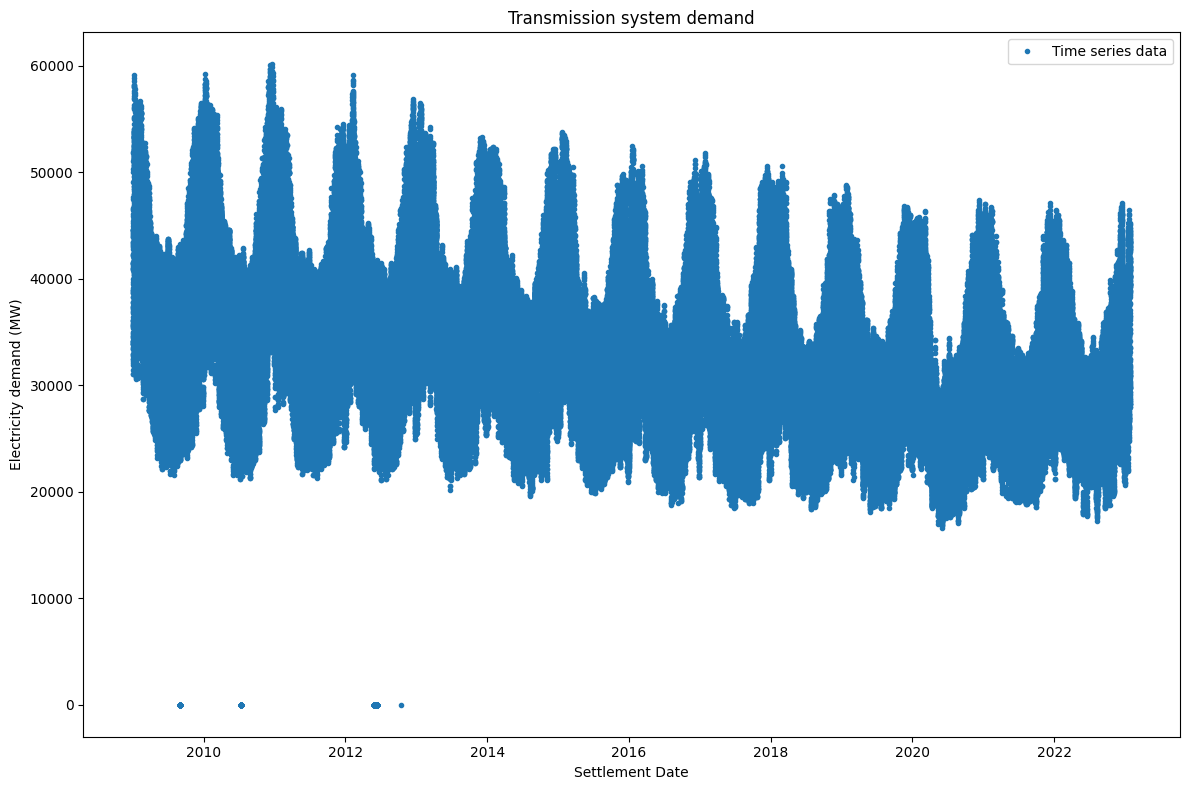

In [ ]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df1['settlement_date'], df1['tsd'], '.', label='Time series data', )

# Formating the plot
ax.set_xlabel('Settlement Date')
ax.set_ylabel('Electricity demand (MW)')
ax.set_title('Transmission system demand')
ax.legend()

# Adjust layout and formatting
plt.tight_layout()
plt.show()

###From the visualization above a trend can be noticed. There is a decrease in the transmission system demand from the year 2009 till 2022. It can aslo be noticed that few values of TSD are zero. This means record of the transmission sysytem demand wasn't provided at these point. These are called OUTLIERS. To prevent them from affecting the performance of the models, the settlement date records where the value of TSD is zero will be removed.

In [ ]:
# Counting the number of times a TSD has a value of zero
tsd_zeros = df1['tsd'].value_counts()[0]

print(f'The number of times TSD has a value of zero is: {tsd_zeros} times')

The number of times TSD has a value of zero is: 479 times


Let's plot the Tranmssion System Demand and have a pictorial view of the values of the demand.

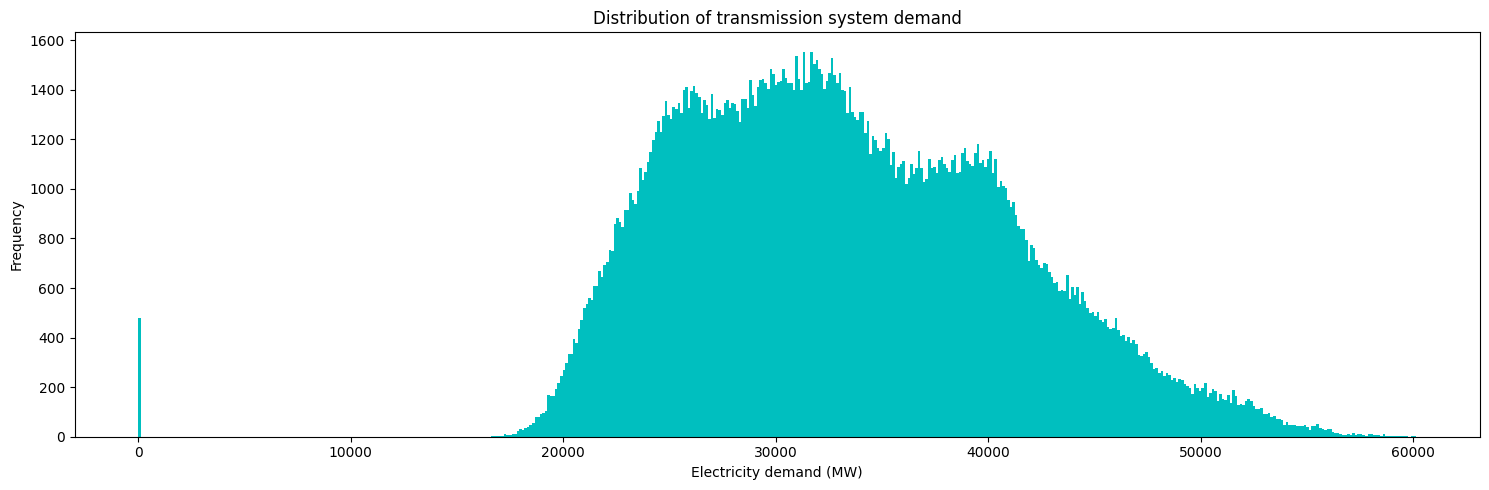

In [ ]:
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting a histogram of the "tsd" column
ax.hist(df1['tsd'], bins=500, color='c')

# Formating the plot
ax.set_xlabel('Electricity demand (MW)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of transmission system demand')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

In [ ]:
# Find the unique dates with zero values in "tsd" column
null_days = df1.loc[df1['tsd'] == 0.0, 'settlement_date'].unique()

# Drop rows with zero values in "tsd" column
df1 = df1[~df1['settlement_date'].isin(null_days)]

# Reset the index of the DataFrame
df1.reset_index(drop=True, inplace=True)

Let's check if TSD still has a values of zero

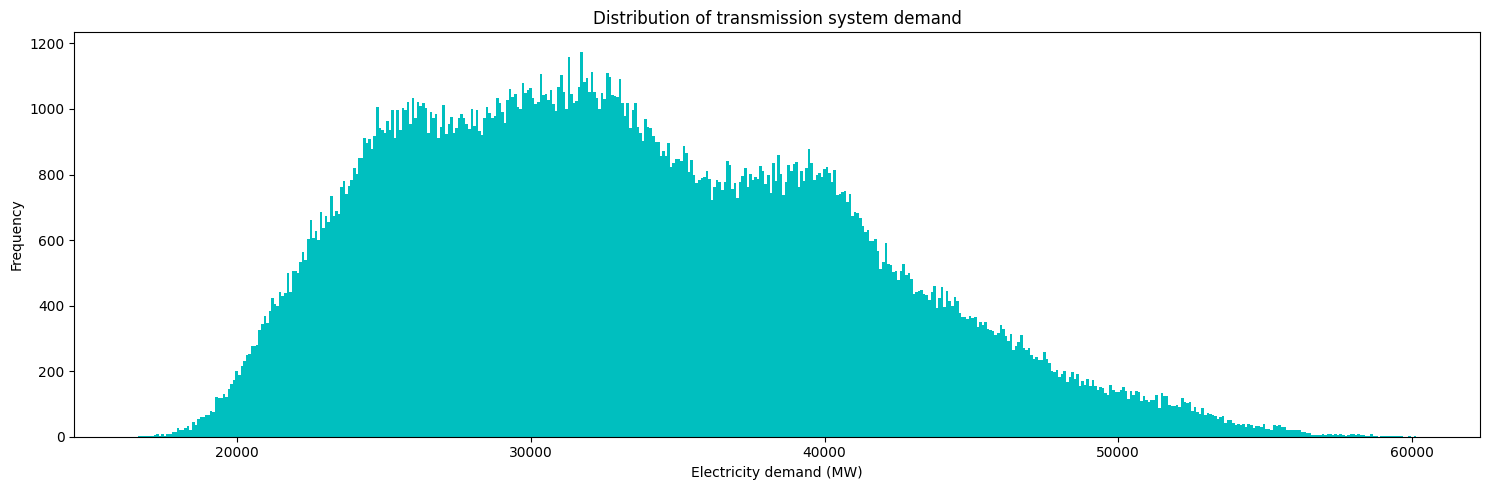

In [ ]:
# Plotting a histogram of the "tsd" column
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(df1['tsd'], bins=500, color='c')

# Formating the plot
ax.set_xlabel('Electricity demand (MW)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of transmission system demand')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

##Let's take a look at the relationship between the temperature and electricity demand, for few years like 2010, 2015 and 2020

Let's see the relationship between the temperature and electricity demand, for year 2015

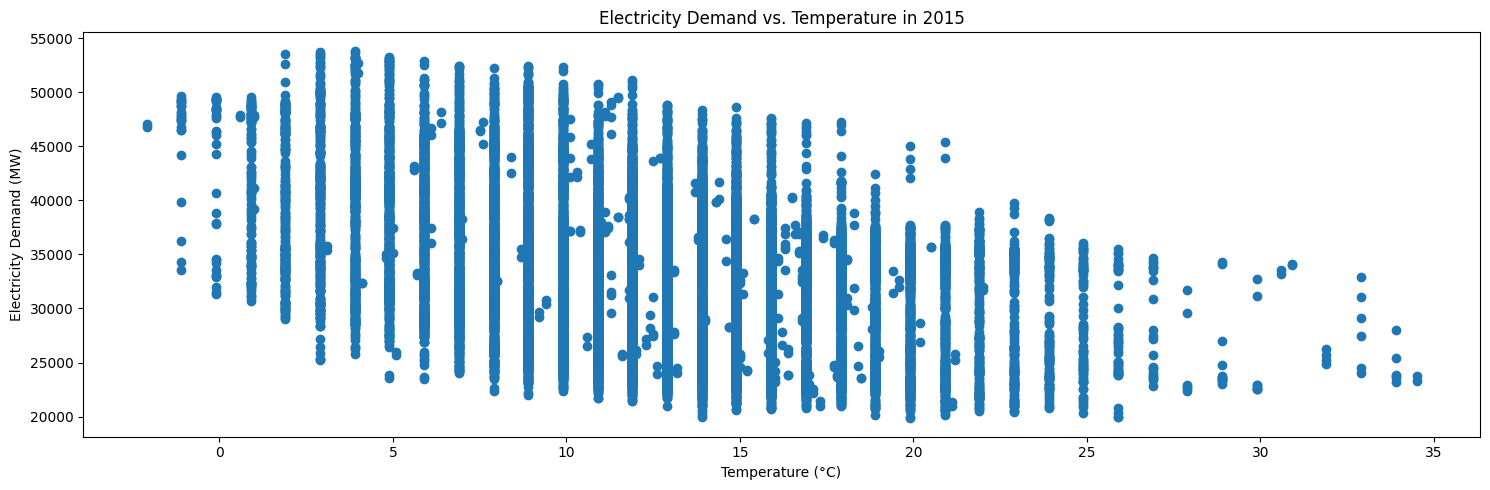

In [ ]:
data = df1[(df1['settlement_date'] >= pd.Timestamp(2015, 1, 1)) & (df1['settlement_date'] < pd.Timestamp(2016, 1, 1))]

# Creating a scatter plot with temperature on the x-axis and electricity demand on the y-axis
plt.figure(figsize=(15, 5))
plt.scatter(data['temperature'], data['tsd'])

# Formating the plot
plt.title('Electricity Demand vs. Temperature in 2015')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Demand (MW)')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Let's see the relationship between the temperature and electricity demand, for year 2020

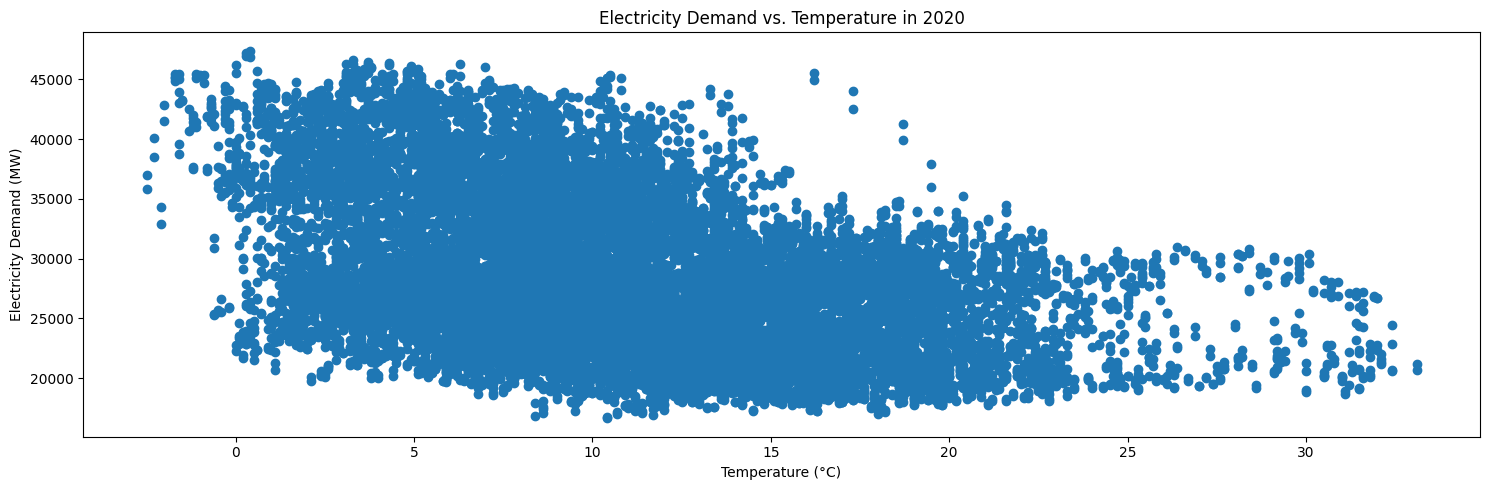

In [ ]:
data = df1[(df1['settlement_date'] >= pd.Timestamp(2020, 1, 1)) & (df1['settlement_date'] < pd.Timestamp(2021, 1, 1))]

# Creating a scatter plot with temperature on the x-axis and electricity demand on the y-axis
plt.figure(figsize=(15, 5))
plt.scatter(data['temperature'], data['tsd'])

# Formating the plot
plt.title('Electricity Demand vs. Temperature in 2020')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Demand (MW)')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Let's see the relationship between the temperature and electricity demand, for year 2010

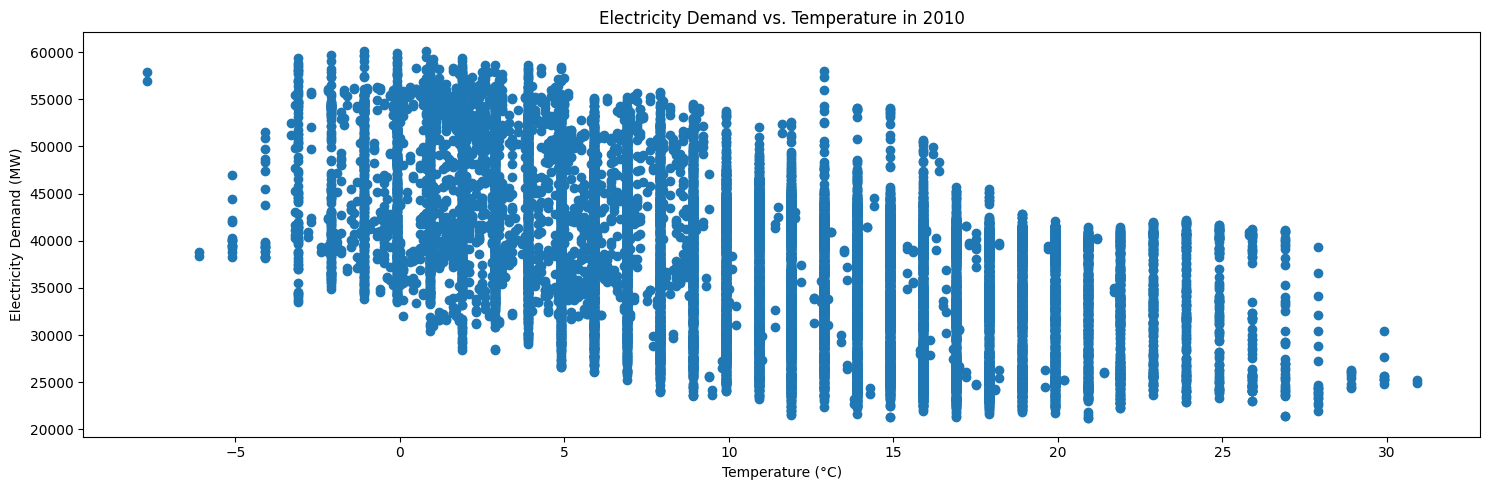

In [ ]:
data = df1[(df1['settlement_date'] >= pd.Timestamp(2010, 1, 1)) & (df1['settlement_date'] < pd.Timestamp(2011, 1, 1))]

# Creating a scatter plot with temperature on the x-axis and electricity demand on the y-axis
plt.figure(figsize=(15, 5))
plt.scatter(data['temperature'], data['tsd'])

# Formating the plot
plt.title('Electricity Demand vs. Temperature in 2010')
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Demand (MW)')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

1.   From the three plots above, the relationship between temperature and Electricity demand was compared for the year 2020, 2015 and 2010.
2.   A similar trend can be observed amongst these years. It is noticed that there is a down trend such that with increase in temperature, the electricity demand decreases and vice versal.




##Let's take a look at the trend of the Electricity demand(TSD) for few years like 2010, 2015 and 2020

Electricity Demand (TSD) for year 2010

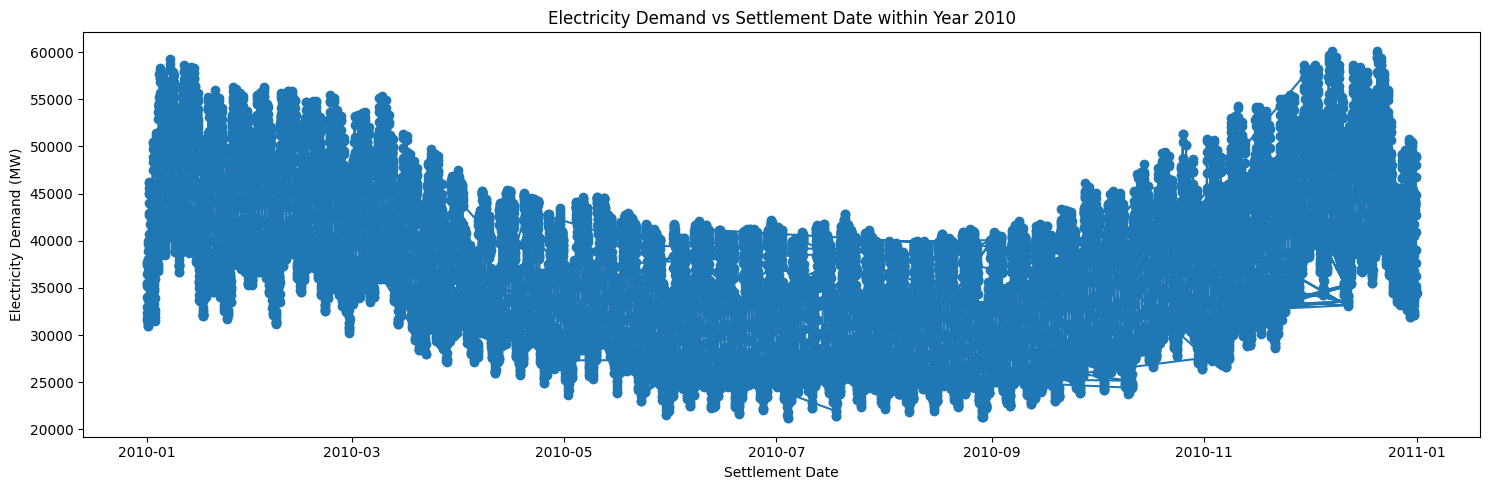

In [ ]:
# Extracting the year from the 'settlement_date' column
df1['Year'] = df1['settlement_date'].dt.year

# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2010]

# Creating a line plot using the 'Date' column and the 'Electricity Demand' column
plt.figure(figsize=(15, 5))
plt.plot(year_df['settlement_date'], year_df['tsd'], marker='o')

# Formating the plot
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Electricity Demand vs Settlement Date within Year 2010')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Electricity Demand (TSD) for year 2015

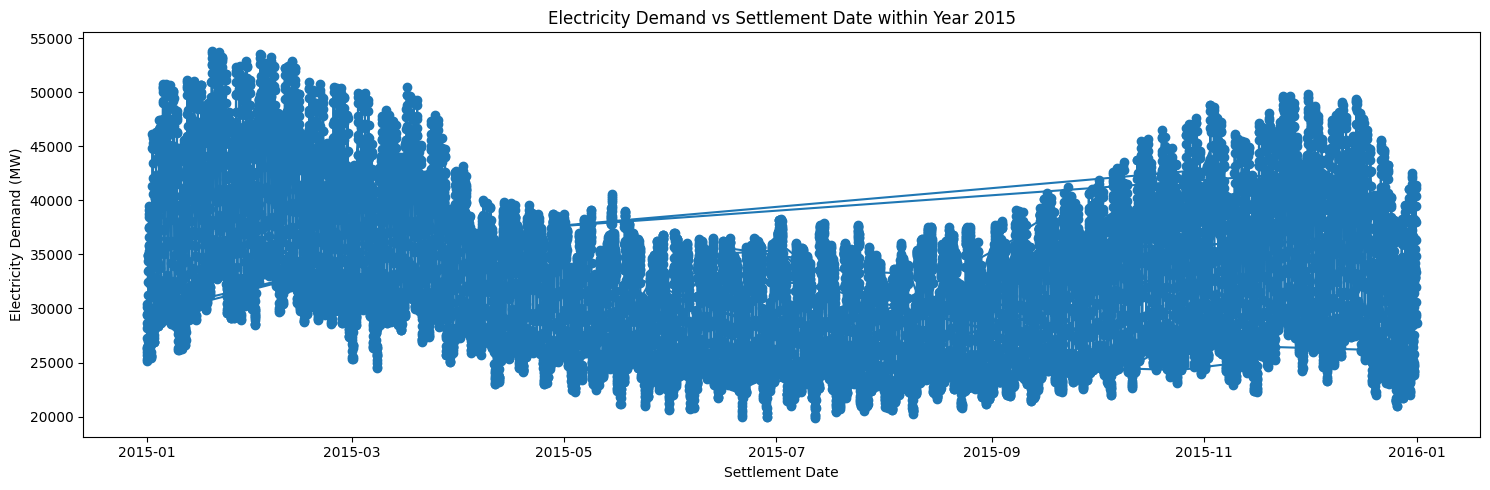

In [ ]:
# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2015]

# Creating a line plot using the 'Date' column and the 'Electricity Demand' column
plt.figure(figsize=(15, 5))
plt.plot(year_df['settlement_date'], year_df['tsd'], marker='o')

# Formating the plot
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Electricity Demand vs Settlement Date within Year 2015')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Electricity Demand (TSD) for year 2020

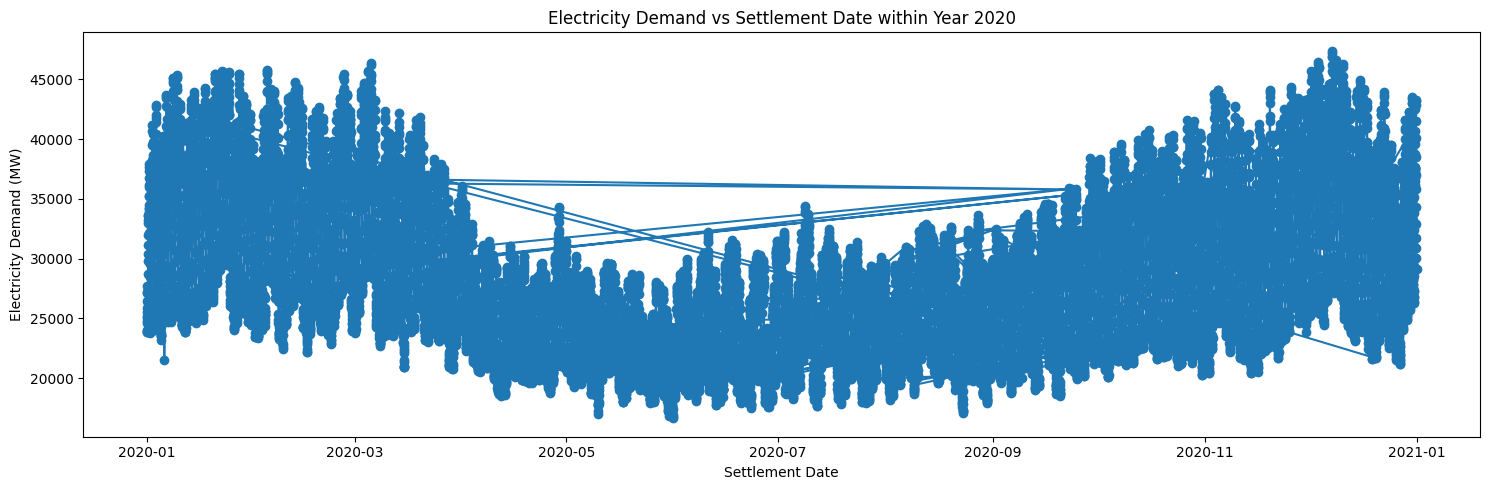

In [ ]:
# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2020]

# Creating a line plot using the 'Date' column and the 'Electricity Demand' column
plt.figure(figsize=(15, 5))
plt.plot(year_df['settlement_date'], year_df['tsd'], marker='o')

# Formating the plot
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Electricity Demand vs Settlement Date within Year 2020')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

1.   The three plots above, shows the trend of the Electricity demand(TSD) for the year 2010, 2015 and 2020.
2.   A similar trend can be observed amongst these years. It is noticed in the years that Elecricticy demand are lower with the 4th month (April) to the 10th month (October). The trend shows that Electricity demand is reduced drastically within the SUMMER period.

##Let's take a look at the relationship between the Holiday period (is_holiday and electricity demand (tsd), for few years like 2010, 2015 and 2020

Relationship between Electricity Demand (tsd) and Holiday period (is_hoiday) for year 2010

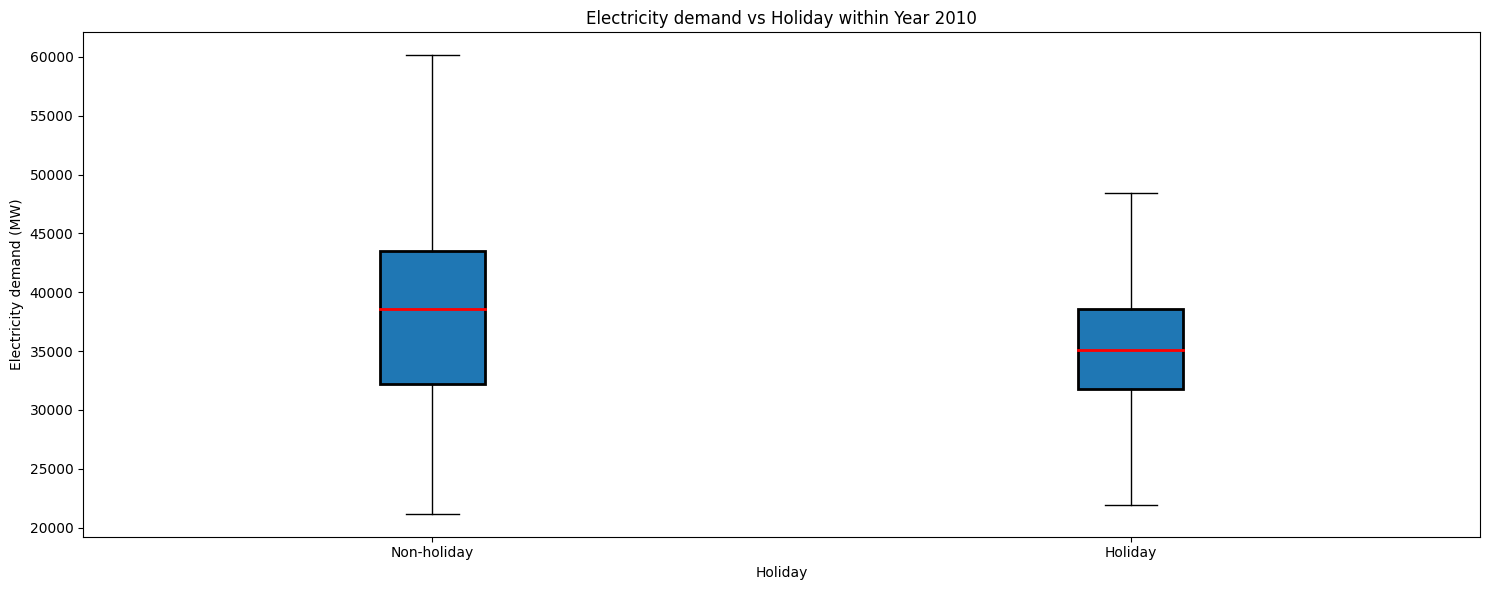

In [ ]:
# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2010]

# Creating a box plot showing the electricity demand data for both holidays and non-holidays
plt.figure(figsize=(15, 6))
boxprops = {'linewidth': 2, 'color': 'black'}
medianprops = {'linewidth': 2, 'color': 'red'}
plt.boxplot([year_df[year_df['is_holiday'] == 0]['tsd'], year_df[year_df['is_holiday'] == 1]['tsd']], 
            labels=['Non-holiday', 'Holiday'], boxprops=boxprops, medianprops=medianprops,
            patch_artist=True, showfliers=False)

# Formating the plot
plt.xlabel('Holiday')
plt.ylabel('Electricity demand (MW)')
plt.title('Electricity demand vs Holiday within Year 2010')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Relationship between Electricity Demand (tsd) and Holiday period (is_hoiday) for year 2015

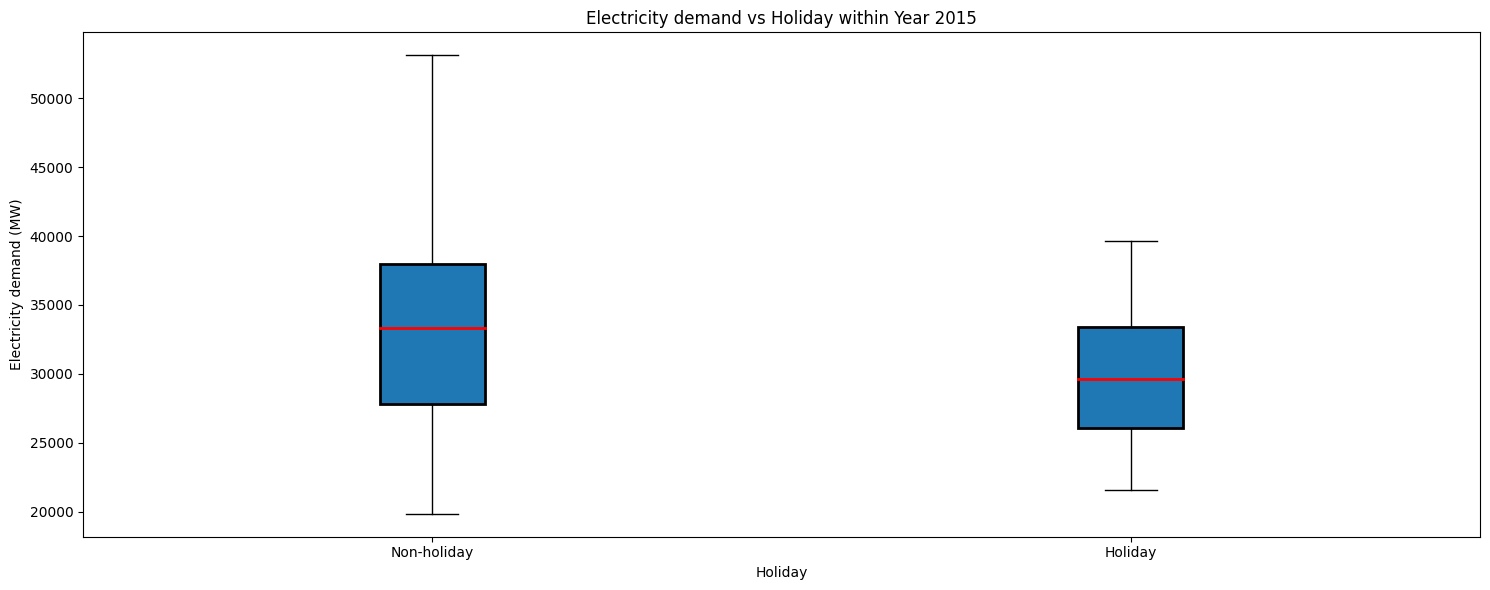

In [ ]:
# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2015]

# Creating a box plot showing the electricity demand data for both holidays and non-holidays
plt.figure(figsize=(15, 6))
boxprops = {'linewidth': 2, 'color': 'black'}
medianprops = {'linewidth': 2, 'color': 'red'}
plt.boxplot([year_df[year_df['is_holiday'] == 0]['tsd'], year_df[year_df['is_holiday'] == 1]['tsd']], 
            labels=['Non-holiday', 'Holiday'], boxprops=boxprops, medianprops=medianprops,
            patch_artist=True, showfliers=False)

# Formating the plot
plt.xlabel('Holiday')
plt.ylabel('Electricity demand (MW)')
plt.title('Electricity demand vs Holiday within Year 2015')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

Relationship between Electricity Demand (tsd) and Holiday period (is_hoiday) for year 2020

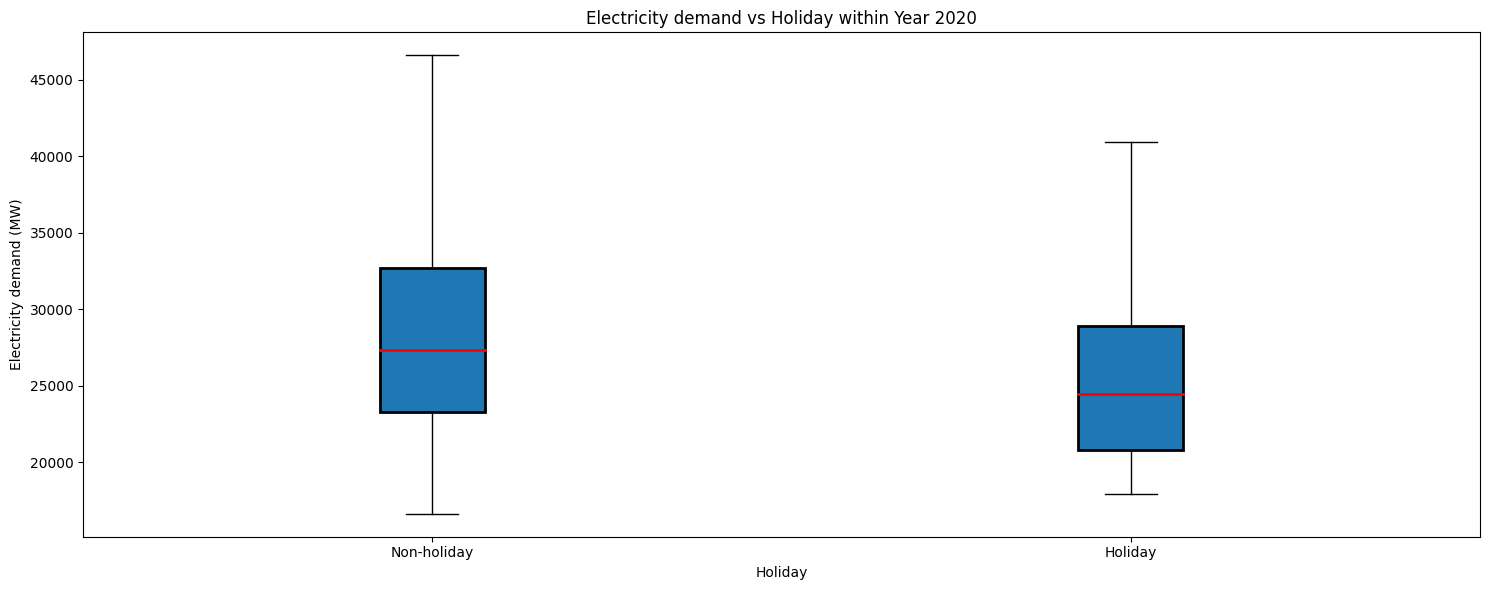

In [ ]:
# Filtering the dataset to include only the data for the chosen year
year_df = df1[df1['Year'] == 2020]

# Creating a box plot showing the electricity demand data for both holidays and non-holidays
plt.figure(figsize=(15, 6))
boxprops = {'linewidth': 2, 'color': 'black'}
medianprops = {'linewidth': 2, 'color': 'red'}
plt.boxplot([year_df[year_df['is_holiday'] == 0]['tsd'], year_df[year_df['is_holiday'] == 1]['tsd']], 
            labels=['Non-holiday', 'Holiday'], boxprops=boxprops, medianprops=medianprops,
            patch_artist=True, showfliers=False)

# Formating the plot
plt.xlabel('Holiday')
plt.ylabel('Electricity demand (MW)')
plt.title('Electricity demand vs Holiday within Year 2020')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

1.   The three plots above, shows the relationship between Electricity Demand (tsd) and Holiday period (is_hoiday) for year 2010, 2015 and 2020.
2.   A similar trend can be observed amongst these years. It is noticed in the years that there are more Elecricticy demand where there no Holidays compared to the Holiday period.

# Data Preprocessing

In [ ]:
df_prep = df1.drop(['Year','period_time'], axis=1)
df_prep.set_index('settlement_date', inplace=True)

In [ ]:
df_prep.describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,temperature
count,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246165.000000,246146.000000
mean,24.497288,31889.973936,33336.965454,29006.881514,1203.066431,4173.860049,790.546609,7676.196003,7.546524,322.375350,924.713891,5.348985,539.119570,-106.859314,-23.981744,145.286698,0.022806,11.609097
std,13.852095,7790.335973,7588.255261,7063.437516,921.718999,1916.384587,1589.203382,5484.235765,41.616081,546.150323,1093.720654,298.369395,508.731342,221.168972,250.798740,384.577363,0.149284,5.999041
min,1.000000,13367.000000,16629.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,0.000000,-7.700000
25%,12.000000,25674.000000,27312.000000,23344.000000,515.000000,2085.000000,0.000000,1796.000000,0.000000,8.000000,214.000000,0.000000,0.000000,-251.000000,-125.000000,0.000000,0.000000,7.100000
50%,24.000000,31326.000000,32545.000000,28470.000000,962.000000,4126.000000,0.000000,9169.000000,0.000000,12.000000,1273.000000,0.000000,762.000000,-118.000000,0.000000,0.000000,0.000000,11.600000
75%,36.000000,37633.000000,38791.000000,34257.000000,1634.000000,6182.000000,716.000000,13080.000000,0.000000,477.000000,1902.000000,0.000000,994.000000,45.000000,7.000000,0.000000,0.000000,15.900000
max,48.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9680.000000,13861.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1.000000,35.400000


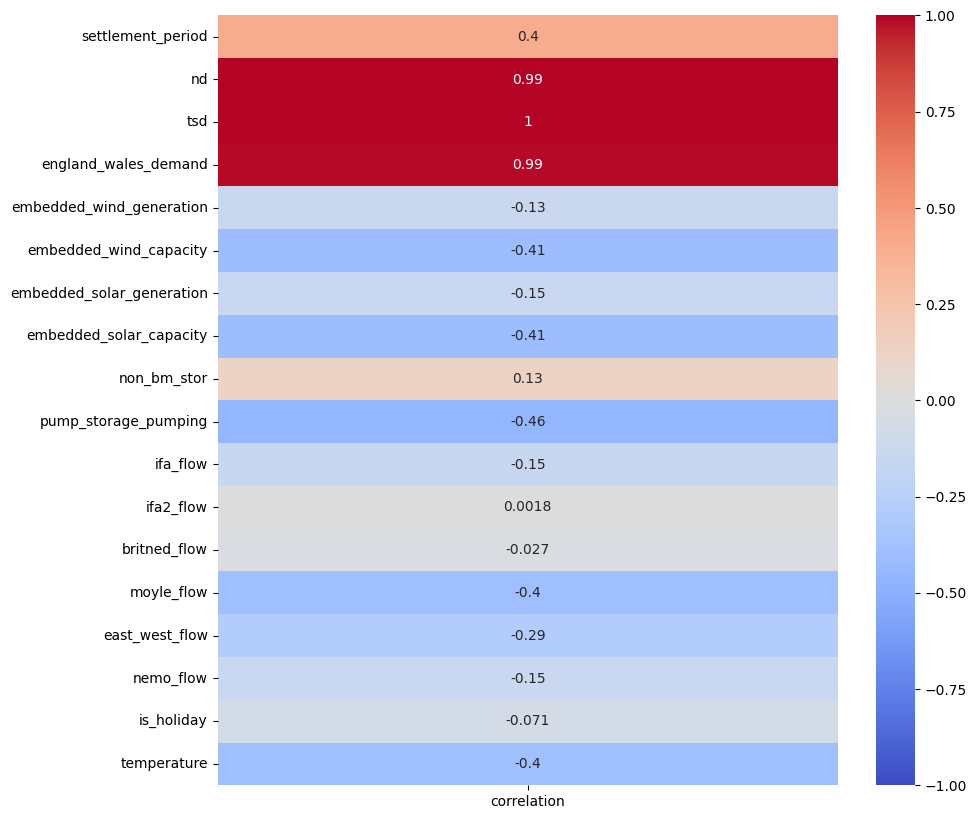

In [ ]:
# Let's take a look at the correlation each features in the dataset with the target column `tsd`
corr_target = df_prep.corrwith(df_prep['tsd'])
corr_df = pd.DataFrame(corr_target, columns=['correlation'])
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Implementing MinMaxScalling for numerical features, which converts the data to have a range between 0 and 1. That would help to make the data well-prepared for the model.

In [ ]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['settlement_period', 'nd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', \
             'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor','pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow', \
             'moyle_flow', 'east_west_flow', 'nemo_flow', 'temperature']

scaler = MinMaxScaler()
df_prep[numerical] = scaler.fit_transform(df_prep[numerical])

# Experimental Process

In the project, the **independent variables** have been chosen as follows:
1. **temperature**	
2. **settlement_period**
3. **nd** 
4. **england_wales_demand**
5. **embedded_wind_generation**
6. **embedded_wind_capacity**
7. **embedded_solar_generation** 
8. **embedded_solar_capacity** 
9. **non_bm_stor**
10. **pump_storage_pumping**
11. **ifa_flow**
12. **ifa2_flow**
13. **britned_flow**
14. **moyle_flow**
15. **east_west_flow**
16. **nemo_flow**
17. **is_holiday**

Also, the Electricity Demand **tsd** variable is considered to be the **dependent variable**, since it is our concern in this project.

In [ ]:
# Splitting to training and testing
threshold_date = "01-01-2021"
df_train = df_prep.loc[df_prep.index < threshold_date]
df_test = df_prep.loc[df_prep.index >= threshold_date]

In [ ]:
# Prepare the training, testing data
X_train = df_train.drop('tsd', axis=1)
y_train = df_train['tsd']

X_test = df_test.drop('tsd', axis=1)
y_test = df_test['tsd']

# Xgboost Regressor
This model is generated from the Xgboost library imported in cell 3 

In [ ]:
# Initialize the XGBoost Regressor with a specific n_estimators value
xgb_reg = xgb.XGBRegressor(base_score=0.5, objective='reg:squarederror',\
                           n_estimators = 1000, random_state=42, \
                           max_depth=3, booster='gbtree', \
                           learning_rate=0.01)

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
# Snippet from (https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/#:~:text=Mini%2DCourse%20Now-,Early%20Stopping%20to%C2%A0Avoid%20Overfitting,-Early%20stopping%20is)
# Train the model with early stopping to avoid over fitting
%%time
xgb_reg.fit(X_train, y_train, \
            eval_set=eval_set, early_stopping_rounds=50, verbose=100)

# Roll back the model to the one with the best performance
best_iteration = xgb_reg.best_iteration
print(f"Best iteration: {best_iteration}")

[0]	validation_0-rmse:34468.52829	validation_1-rmse:30012.35817
[100]	validation_0-rmse:12653.90927	validation_1-rmse:11421.43331
[200]	validation_0-rmse:4680.80149	validation_1-rmse:4799.61471
[300]	validation_0-rmse:1775.78613	validation_1-rmse:2575.04186
[400]	validation_0-rmse:735.11946	validation_1-rmse:1844.53980
[500]	validation_0-rmse:377.19222	validation_1-rmse:1577.91676
[600]	validation_0-rmse:252.15967	validation_1-rmse:1462.51430
[700]	validation_0-rmse:197.28903	validation_1-rmse:1384.97197
[800]	validation_0-rmse:164.49728	validation_1-rmse:1310.86768
[900]	validation_0-rmse:142.15546	validation_1-rmse:1265.33178
[999]	validation_0-rmse:126.35172	validation_1-rmse:1233.61898
Best iteration: 999
CPU times: user 3min 16s, sys: 379 ms, total: 3min 16s
Wall time: 1min 49s


##### Feature Importance in Xgboost

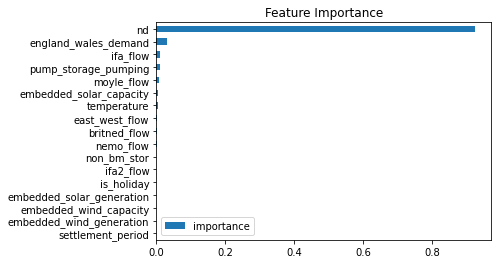

In [ ]:
# Visualize the importance of each column in the performance of the model
feature_imp = pd.DataFrame(data=xgb_reg.feature_importances_,
             index=xgb_reg.feature_names_in_,
             columns=['importance'])
feature_imp.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

From the visualization we can see the impact of each feature in the training of the Xgboost model.

In [ ]:
# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

###### Evaluate the XGBOOST REGRESSOR model with Error Metrics

In [ ]:
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Root Mean Squared Error of the XGBOOST model is: %.2f MW" % rmse_xgboost)
print("Mean Absolute Percentage Error of the XGBOOST model is: %.2f" % mape_xgboost)

Root Mean Squared Error of the XGBOOST model is: 1233.62 MW
Mean Absolute Percentage Error of the XGBOOST model is: 2.63


##### Compare Xgboost predict to Actual (test)

In [ ]:
# Create a DataFrame for predictions and set the index to match the test data index
predictions_df = pd.DataFrame(y_pred, columns=['Predictions'], index= y_test.index)

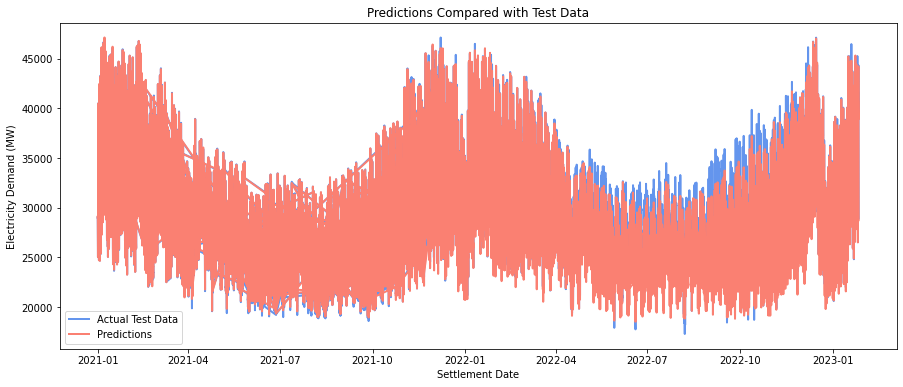

In [ ]:
# Plot the predictions compared with the test data
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Test Data', color='cornflowerblue', linewidth=2)
plt.plot(predictions_df, label='Predictions', color='salmon', linewidth=2)
plt.title('Predictions Compared with Test Data')
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()

# Testing for stationarity
To successfully undertake a time series project, it is essential to comprehend the statistical properties of the data, which represents a significant obstacle. Specifically, one must exercise caution to ensure the data is stationary before proceeding with modeling. Stationarity implies that the statistical characteristics of the data do not alter over time.

In [ ]:
df_prep2 = df1.drop(['Year','period_time'], axis=1)
df_prep2.set_index('settlement_date', inplace=True)

In [ ]:
# This converts the date to daily buy summing up the Electricity demand for each day
df_prep2 = df_prep2["tsd"].resample("D").sum().to_frame()
df_prep2.head()

,tsd
settlement_date,
2009-01-01,1849363
2009-01-02,1974406
2009-01-03,1952054
2009-01-04,1968670
2009-01-05,2271471


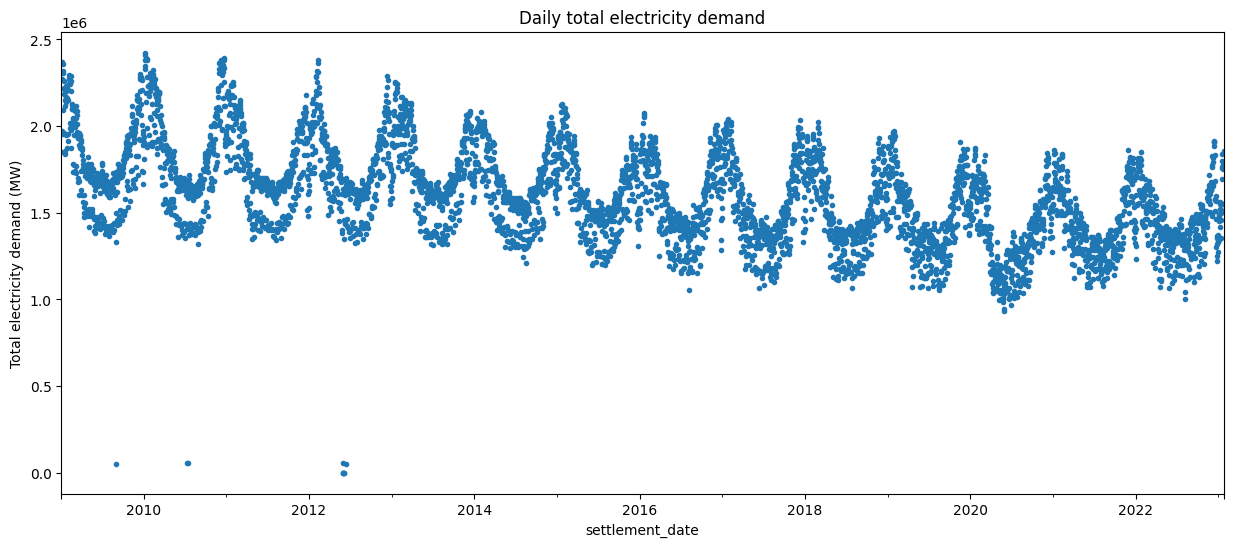

In [ ]:
df_prep2["tsd"].plot(
    style=".",
    figsize=(15, 6),
    ylabel="Total electricity demand (MW)",
    title="Daily total electricity demand",
);

As seen there are some outlier present. To resolve this I will be replacing them with mean value of they year they fall into

In [ ]:
def replace_with_yearly_mean(df, threshold=500000):
    years = df_prep2.index.year.unique()
    
    for year in years:
        yearly_data = df_prep2[df_prep2.index.year == year]
        mean_value = yearly_data['tsd'].mean()
        
        df_prep2.loc[(df_prep2.index.year == year) & (df_prep2['tsd'] < threshold), 'tsd'] = mean_value

    return df_prep2

In [ ]:
df_prep2 = replace_with_yearly_mean(df_prep2)

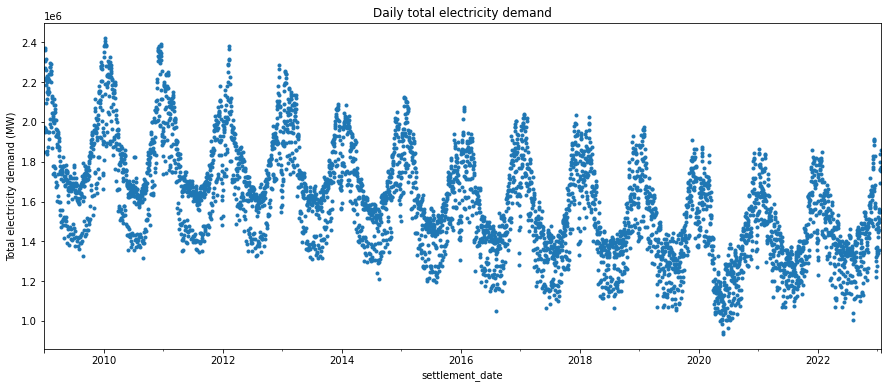

In [ ]:
df_prep2["tsd"].plot(
    style=".",
    figsize=(15, 6),
    ylabel="Total electricity demand (MW)",
    title="Daily total electricity demand",
);

##### seasonal decomposition

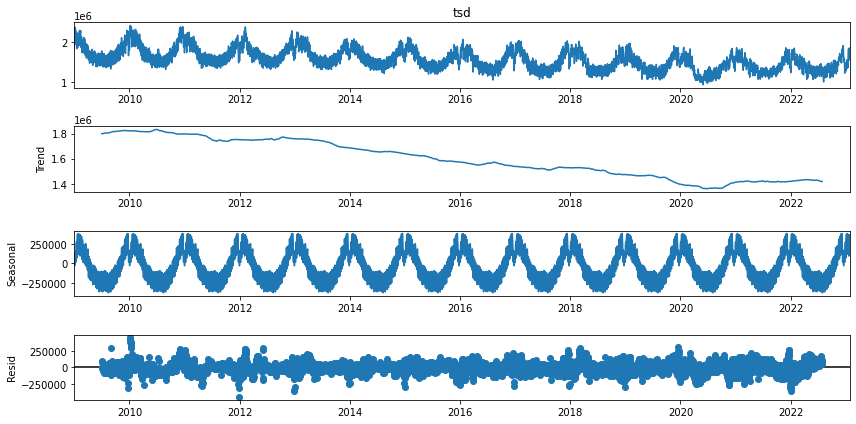

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_prep2["tsd"], model="additive",period=364)
fig = decompose_data.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()

To check if the data is stationary, two tests will be carried out: 


1.   ADF test
2.   KPSS Test



In [ ]:
# Importing Adf and Kpss library
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Snippet from (https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53#:~:text=from%20statsmodels.tsa,adf_test(df%5B%27AvgTemp%27%5D))
# Defining a function to perform ADF test on the data
def adf_test(dataset):
    # Perform ADF test
    adf_test = adfuller(dataset, autolag='AIC')
    print('ADF test results:')
    print(f'ADF test statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print('Critical values:')
    for key, value in adf_test[4].items():
        print(f'{key}: {value}')
    # Interpret the results
    if adf_test[0] < adf_test[4]['5%'] and adf_test[1] < 0.05:
        print('The time series is stationary')
    else:
        print('The time series is not stationary')

In [ ]:
adf_test(df_prep2['tsd'])

ADF test results:
ADF test statistic: -3.8230685632775763
p-value: 0.002679918301628821
Critical values:
1%: -3.431631604543944
5%: -2.8621063331869445
10%: -2.5670714594015394
The time series is stationary


In [ ]:
# Snippet from (https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/#:~:text=%23define%20function%20for%20kpss,key%5D%20%3D%20value%0Aprint%20(kpss_output))
# Defining a function to perform KPSS test on the data
def kpss_test(dataset):
    # Perform KPSS test
    kpss_test = kpss(dataset)
    print('KPSS test results:')
    print(f'KPSS test statistic: {kpss_test[0]}')
    print(f'p-value: {kpss_test[1]}')
    print(f'Lags used: {kpss_test[2]}')
    # Interpret the results
    if kpss_test[1] < 0.05:
        print('The time series is not stationary')
    else:
        print('The time series is stationary')

In [ ]:
kpss_test(df_prep2['tsd'])

KPSS test results:
KPSS test statistic: 5.114465646261404
p-value: 0.01
Lags used: 42
The time series is not stationary


Outcomes of the two statistical tests for stationarity: KPSS indicates non-stationarity and ADF indicates stationarity. The visualization below shows the trend of the Electricty demand of which it shows a downward trend and this not stationary

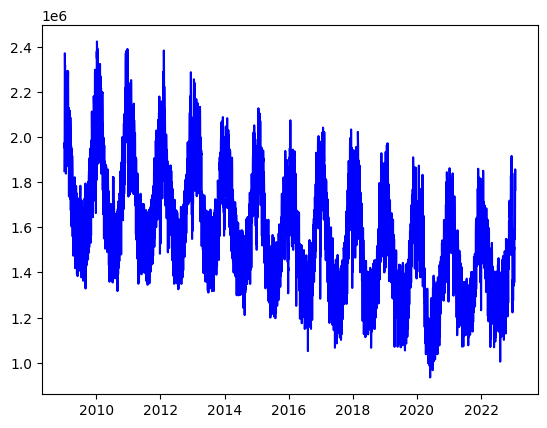

In [ ]:
plt.plot(df_prep2, color="blue")
plt.show()

To convert the data into a stationary data, I will apply the differencing method where the data is subtracted from the previous value

##### Autocorrelation Function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

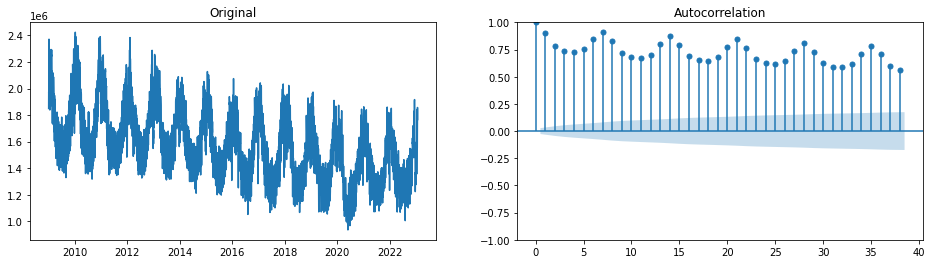

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(df_prep2['tsd'])
ax1.set_title("Original")
plot_acf(df_prep2['tsd'], ax = ax2);

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_prep2['tsd'], test ='kpss')

1

The code above determines the number difference needed to be performed for the data to be stationary. As shown below it is only needed to be done once.

###### P
p is the order of the Auto Regressive(AR) term. It is the number of lags to be used as predictors.
P can be determined by inspecting the Partial Autocorrelation (PACF) plot. PACF plot represents the correlation between the series and its lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

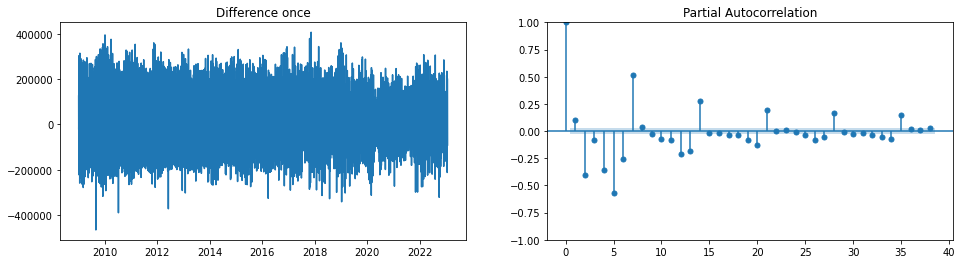

In [ ]:
diff = df_prep2['tsd'].diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

We can take p to be 2

###### q
q is the order of the Moving Average (MA) term. q refers to the number of lagged forecast errors that should go into te ARIMA Model.
q can be determined from the ACF plot

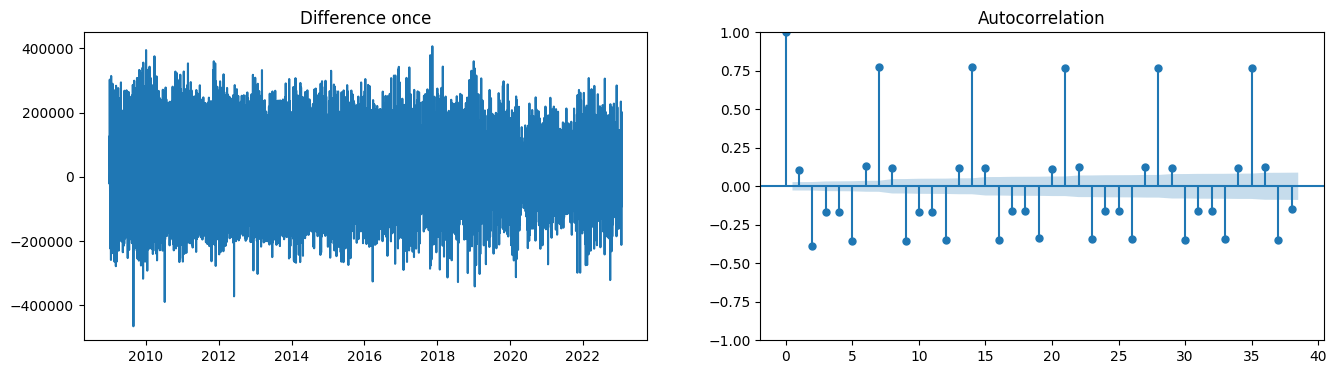

In [ ]:
diff = df_prep2['tsd'].diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax = ax2);

The lag value just before this cut-off point is therefore: q = 2

Spliting the data into train and test data

In [ ]:
threshold_date = "01-01-2021"
train_df = df_prep2.loc[df_prep2.index < threshold_date, "tsd"]
test_df = df_prep2.loc[df_prep2.index >= threshold_date, "tsd"]

# Autoregressive Integrated Moving Average (ARIMA) Model
This model is generated from the statsmodels library imported in cell 3
###### Fitting the ARIMA Model

In [ ]:
%%time
# Fit an ARIMA model with p=2, d=1, q=2
model = sm.tsa.arima.ARIMA(train_df, order = (2, 1, 2))
result = model.fit()

CPU times: user 1.83 s, sys: 1.38 s, total: 3.21 s
Wall time: 1.66 s


In [ ]:
start=len(train_df)
end=len(train_df)+len(test_df)-1
pred_a = result.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

###### Evaluate the ARIMA model with Error Metrics

In [ ]:
mape_arima = mean_absolute_percentage_error(test_df, pred_a)
rmse_arima = np.sqrt(mean_squared_error(test_df, pred_a))

In [ ]:
print("Root Mean Squared Error of the ARIMA model is: %.2f MW" % rmse_arima)
print("Mean Absolute Percentage Error of the ARIMA model is: %.2f" % mape_arima)

Root Mean Squared Error of the ARIMA model is: 213384.54 MW
Mean Absolute Percentage Error of the ARIMA model is: 13.57


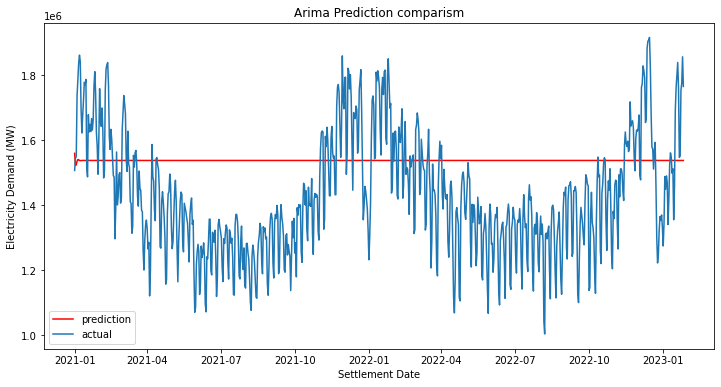

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pred_a, color = "red", label='prediction')
plt.plot(test_df, label='actual')
plt.title('Arima Prediction comparism')
plt.legend()
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.show()

From the Root mean squared error calculated above and the visualization shown. It is evident that the ARIMA model didn't perform well. As it is unable to capture the trend. 

There might be improvement if the parameters are refined, but the model takes too long to run.

# Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
This model is generated from the statsmodels library imported in cell 3

In [ ]:
import statsmodels.api as sm

In [ ]:
%%time
# Fit a SARIMAX model with p=2, d=1, q=1, seaonality = 12
model_sarimax = sm.tsa.statespace.SARIMAX(train_df, order = (2, 1, 2), seasonal_order = (2,1,2,12))
result_s = model_sarimax.fit()

CPU times: user 1min 47s, sys: 56.6 s, total: 2min 43s
Wall time: 1min 50s


In [ ]:
start=len(train_df)
end=len(train_df)+len(test_df)-1
pred_s = result_s.predict(start=start,end=end,typ='levels').rename('SARIMAX Predictions')

###### Evaluate the SARIMAX model with Error Metrics

In [ ]:
mape_sarimax = mean_absolute_percentage_error(test_df, pred_s)
rmse_sarimax = np.sqrt(mean_squared_error(test_df, pred_s))

In [ ]:
print("Root Mean Squared Error of the SARIMAX model is: %.2f MW" % rmse_sarimax)
print("Mean Absolute Percentage Error of the SARIMAX model is: %.2f" % mape_sarimax)

Root Mean Squared Error of the SARIMAX model is: 271288.56 MW
Mean Absolute Percentage Error of the SARIMAX model is: 17.84


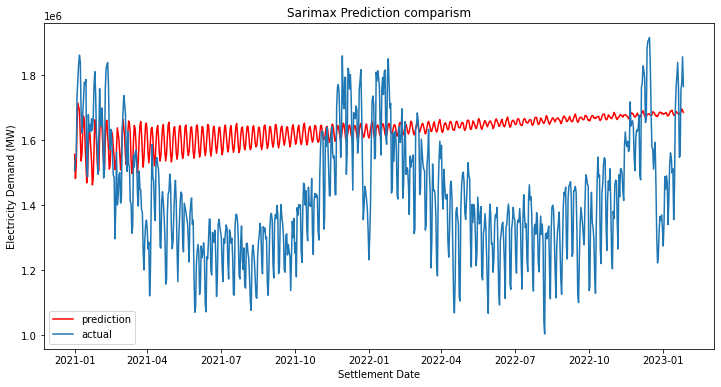

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pred_s, color = "red", label='prediction')
plt.plot(test_df, label='actual')
plt.title('Sarimax Prediction comparism')
plt.legend()
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.show()

From the Root mean squared error calculated above and the visualization shown. It is evident that the SARIMAX model didn't perform well. As it is unable to capture the seasonalty present in the data.

There might be improvement if the parameters are refined, but the model takes too long to run.

# Prophet
This model is generated from the Prophet library imported in cell 3

###### Train / Test Split

In [ ]:
prophet_data = df1.set_index('settlement_date').copy()

In [ ]:
threshold_date = "01-01-2021"
train_df = prophet_data.loc[prophet_data.index < threshold_date, "tsd"]
test_df = prophet_data.loc[prophet_data.index >= threshold_date, "tsd"]

In [ ]:
train_df = train_df.to_frame('tsd')
test_df = test_df.to_frame('tsd')

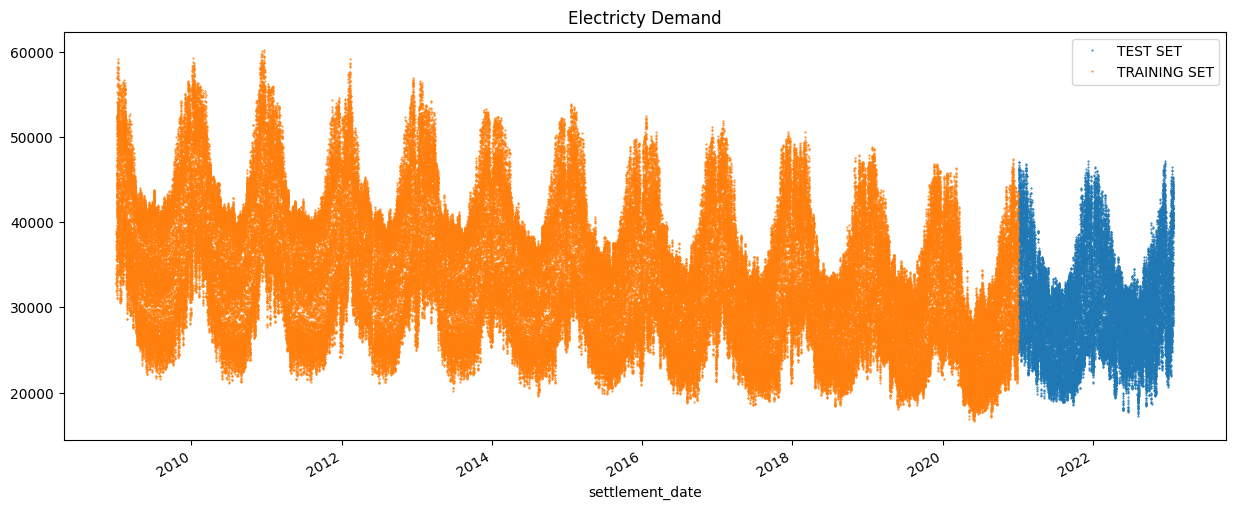

In [ ]:
# Plot train and test so you can see where we have split
test_df \
    .rename(columns={'tsd': 'TEST SET'}) \
    .join(train_df.rename(columns={'tsd': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15, 6), title='Electricty Demand', style='.', ms=1)
plt.show()

Prophet model expects the dataset to be named a specific way. I will rename the dataframe columns before feeding it into the model.

*   settlement_date column named: ds
*   target/ tsd : y




In [ ]:
# Format data for prophet model using ds and y
df_train_prophet = train_df.reset_index() \
    .rename(columns={'settlement_date':'ds',
                     'tsd':'y'})

df_test_prophet = test_df.reset_index() \
    .rename(columns={'settlement_date':'ds',
                     'tsd':'y'})

In [ ]:
# Fit the train data into the prophet model
%%time
prophet_model = Prophet()
prophet_model.fit(df_train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprl61gj25/uo89_l3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprl61gj25/g4_s3x93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78412', 'data', 'file=/tmp/tmprl61gj25/uo89_l3i.json', 'init=/tmp/tmprl61gj25/g4_s3x93.json', 'output', 'file=/tmp/tmprl61gj25/prophet_modelru6b7tx3/prophet_model-20230421155328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 18.8 s, sys: 1.12 s, total: 19.9 s
Wall time: 6min 9s


In [ ]:
# Predict on test set with model and setting seed to 42
np.random.seed(42)
prophet_predict_df = prophet_model.predict(df_test_prophet)
prophet_predict_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,28115.149993,22929.377540,29799.175409,28115.149993,28115.149993,-1724.032479,-1724.032479,-1724.032479,-5484.918548,...,1451.128665,1451.128665,1451.128665,2309.757404,2309.757404,2309.757404,0.0,0.0,0.0,26391.117514
1,2021-01-01 00:30:00,28115.079907,22394.301661,29404.308743,28115.079907,28115.079907,-2225.732522,-2225.732522,-2225.732522,-5977.346660,...,1439.077315,1439.077315,1439.077315,2312.536823,2312.536823,2312.536823,0.0,0.0,0.0,25889.347385
2,2021-01-01 01:00:00,28115.009821,22255.220079,28701.267181,28115.009821,28115.009821,-2605.765275,-2605.765275,-2605.765275,-6347.405532,...,1426.308092,1426.308092,1426.308092,2315.332164,2315.332164,2315.332164,0.0,0.0,0.0,25509.244545
3,2021-01-01 01:30:00,28114.939734,21853.496501,28537.275828,28114.939734,28114.939734,-2945.727677,-2945.727677,-2945.727677,-6676.645986,...,1412.774907,1412.774907,1412.774907,2318.143402,2318.143402,2318.143402,0.0,0.0,0.0,25169.212057
4,2021-01-01 02:00:00,28114.869648,21370.385571,28273.074656,28114.869648,28114.869648,-3301.275279,-3301.275279,-3301.275279,-7020.676462,...,1398.430670,1398.430670,1398.430670,2320.970513,2320.970513,2320.970513,0.0,0.0,0.0,24813.594369


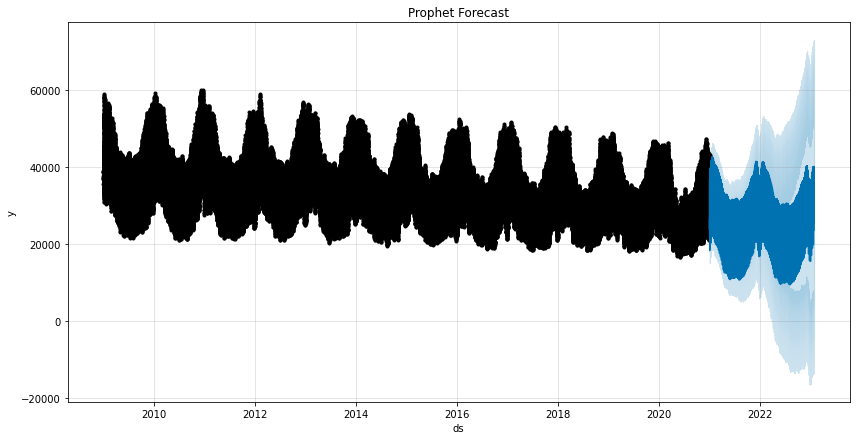

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
fig = prophet_model.plot(prophet_predict_df, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

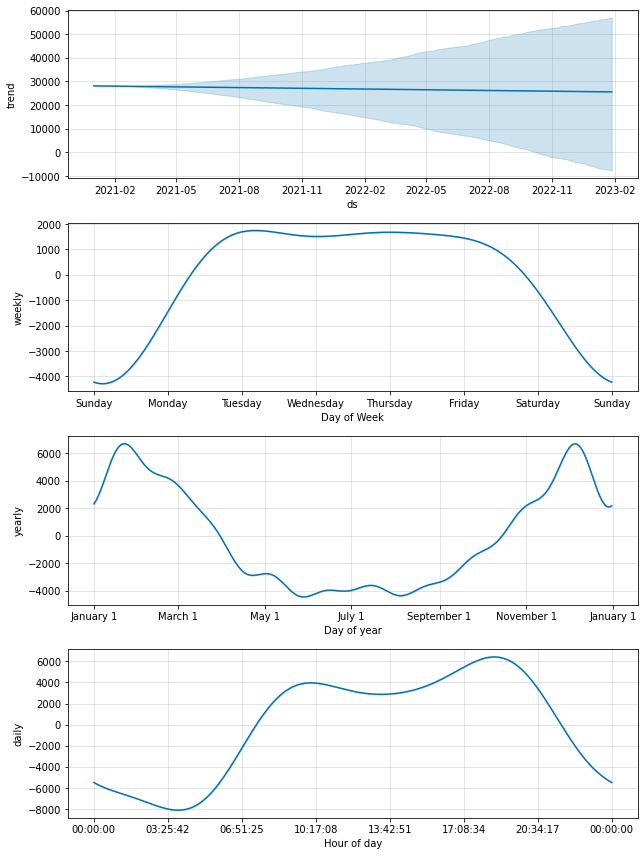

In [ ]:
fig = prophet_model.plot_components(prophet_predict_df)
plt.show()

##### Compare prophet predict to Actual

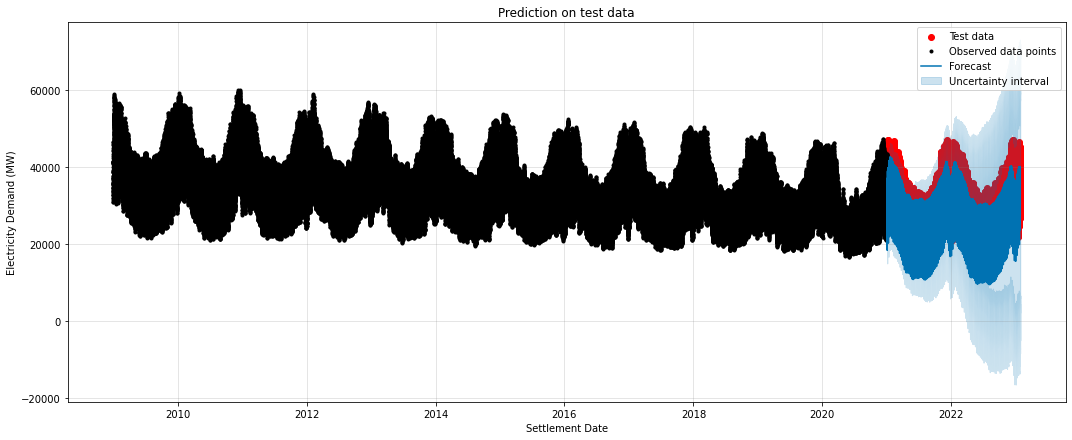

In [ ]:
# Plot the Prophet predictions with the actuals
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(df_test_prophet['ds'], df_test_prophet['y'], color='r', label="Test data")
fig = prophet_model.plot(prophet_predict_df, ax=ax, include_legend=True)

ax.set_title("Prediction on test data")
ax.set_ylabel("Electricity Demand (MW)")
ax.set_xlabel("Settlement Date");

###### Evaluate the Prophet model with Error Metrics

In [ ]:
rmse_prophet = np.sqrt(mean_squared_error(y_true = df_test_prophet['y'], \
                                          y_pred = prophet_predict_df['yhat']))
print("Root Mean Squared Error of the Prophet models is: %.2f MW" % rmse_prophet)

Root Mean Squared Error of the Prophet models is: 6047.16 MW


In [ ]:
mape_prophet = mean_absolute_percentage_error(y_actual = df_test_prophet['y'], \
                               y_pred = prophet_predict_df['yhat'])
print("Mean Absolute Percentage Error of the Prophet model is: %.2f" % mape_prophet)

Mean Absolute Percentage Error of the Prophet model is: 16.44


# LONG-SHORT TERM MEMORY(LSTM)
This model is generated from the Keras library imported in cell 4

Train/Test Split

In [ ]:
df_lstm = df1.set_index('settlement_date').copy()

In [ ]:
# Split the data into train, validation, and test sets
threshold_date1 = "01-01-2021"
threshold_date2 = "01-01-2019"
train_df = df_lstm.loc[(df_lstm.index < threshold_date2), "tsd"]
val_df = df_lstm.loc[(df_lstm.index >= threshold_date2) & (df_lstm.index < threshold_date1), "tsd"]
test_df = df_lstm.loc[df_lstm.index >= threshold_date1, "tsd"]

In [ ]:
train_df = train_df.to_frame('tsd')
val_df = val_df.to_frame('tsd')
test_df = test_df.to_frame('tsd')

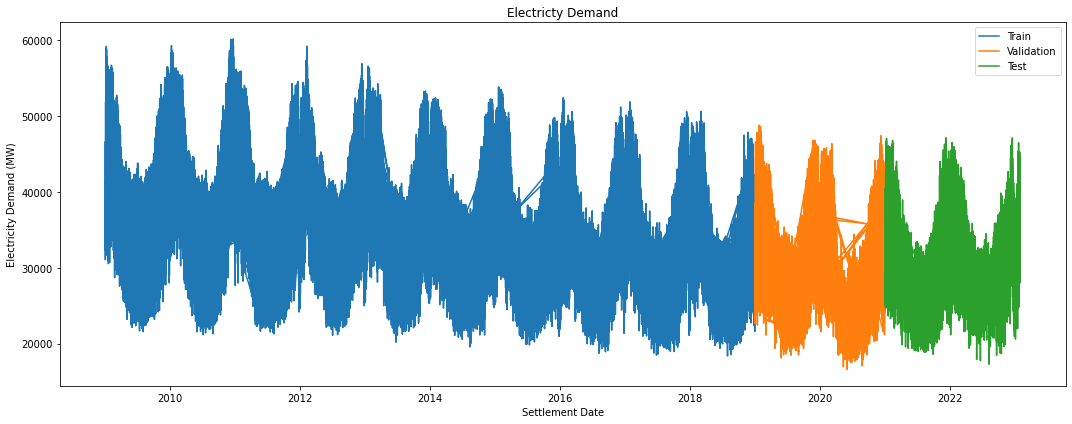

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(train_df)
plt.plot(val_df)
plt.plot(test_df)
plt.title('Electricty Demand')
plt.legend(['Train', 'Validation', 'Test'])
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')

# Adjust layout and formatting
plt.tight_layout()
plt.show()

#### Feature Scaling 
Applying MinMaxScaler to put the values of the data in the same range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()     

In [ ]:
scaler.fit(train_df)
scaled_train = scaler.transform(train_df)
scaled_val = scaler.transform(val_df)
scaled_test = scaler.transform(test_df)

In [ ]:
# define generator
n_input = 12
n_features = 1
batch_size = 32

In [ ]:
# create TimeseriesGenerators for train, validation, and test sets
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=batch_size)
val_generator = TimeseriesGenerator(scaled_val, scaled_val, length=n_input, batch_size=batch_size)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=batch_size)

In [ ]:
X,y = train_generator[0]
X.shape

(32, 12, 1)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

The purpose of this early_stopping is to stop the training process of a neural network model when a monitored metric (in this case, 'val_loss') has stopped improving for a specified number of epochs, referred to as 'patience'(in this case, = 5). This helps prevent overfitting and also saves computational resources.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(train_generator, epochs=25, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/25
5463/5463 [==============================] - 132s 24ms/step - loss: 4.6802e-04 - val_loss: 3.3516e-04
Epoch 2/25
5463/5463 [==============================] - 126s 23ms/step - loss: 4.6740e-04 - val_loss: 3.4732e-04
Epoch 3/25
5463/5463 [==============================] - 122s 22ms/step - loss: 4.6722e-04 - val_loss: 3.2908e-04
Epoch 4/25
5463/5463 [==============================] - 124s 23ms/step - loss: 4.6598e-04 - val_loss: 3.2545e-04
Epoch 5/25
5463/5463 [==============================] - 125s 23ms/step - loss: 4.6644e-04 - val_loss: 3.3984e-04
Epoch 6/25
5463/5463 [==============================] - 122s 22ms/step - loss: 4.6512e-04 - val_loss: 3.5640e-04
Epoch 7/25
5463/5463 [==============================] - 123s 23ms/step - loss: 4.6490e-04 - val_loss: 3.2529e-04
Epoch 8/25
5463/5463 [==============================] - 121s 22ms/step - loss: 4.6450e-04 - val_loss: 3.4257e-04
Epoch 9/25
5463/5463 [==============================] - 123s 22ms/step - loss: 4.6424e-04 - val_

As shown from the train process above, the process was halted by the Early_stopping function because it detected that the val_loss has stopping improving for upto 5 epochs. The Early stopping function aslo helps to avoid Overfitting. It can be observed that the training Process took 36 minutes 2 seconds.

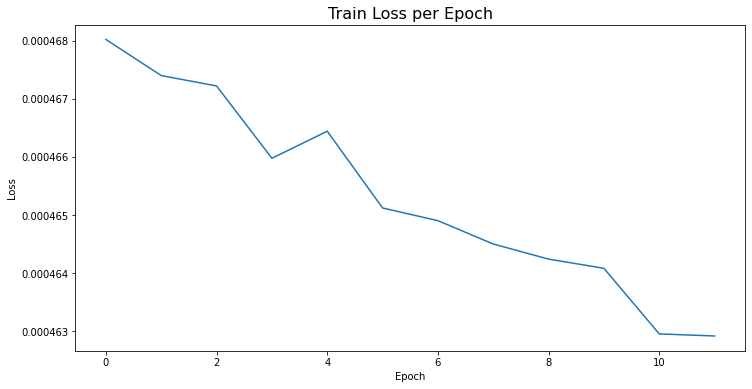

In [ ]:
loss_per_epoch = model.history.history['loss']

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the loss per epoch
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

# Add labels and a title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss per Epoch', fontsize=16)

# Display the plot
plt.show()

The plot above graphically shows the process of the model training. It can be noticed that the training loss has stated to flatten out at around the 10 epoch

In [ ]:
# Make predictions using the LSTM model
predictions = model.predict(test_generator)

1134/1134 [==============================] - 7s 6ms/step


In [ ]:
# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Prepare the actual test values for performance evaluation
actual_test_values = test_df[n_input:]

###### Evaluate the LSTM model with Error Metrics

In [ ]:
mape_lstm = mean_absolute_percentage_error(actual_test_values, predictions)
rmse_lstm = np.sqrt(mean_squared_error(actual_test_values, predictions))

In [ ]:
print("Root Mean Squared Error of the LSTM model is: %.2f MW" % rmse_lstm)
print("Mean Absolute Percentage Error of the LSTM model is: %.2f" % mape_lstm)

Root Mean Squared Error of the LSTM model is: 638.87 MW
Mean Absolute Percentage Error of the LSTM model is: 1.23


###### Compare LSTM predict to Actual test data

In [ ]:
# Create a DataFrame for predictions and set the index to match the test data index
predictions_df = pd.DataFrame(predictions, columns=['Predictions'], index=actual_test_values.index)

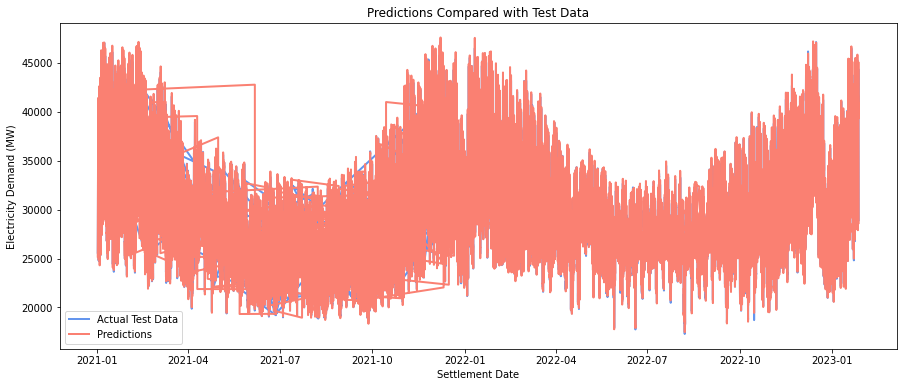

In [ ]:
# Plot the predictions compared with the test data
plt.figure(figsize=(15, 6))
plt.plot(actual_test_values, label='Actual Test Data', color='cornflowerblue', linewidth=2)
plt.plot(predictions_df, label='Predictions', color='salmon', linewidth=2)
plt.title('Predictions Compared with Test Data')
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()

# Models Evaluation
The model used in this Time series project are:


*   XGBoost Regressor
*   Autoregressive Integrated Moving Average (ARIMA) Model
*   Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
*   Prophet
*   LONG-SHORT TERM MEMORY(LSTM)



In [ ]:
model_summary = pd.DataFrame({
        "XGBoost Regressor": [rmse_xgboost, mape_xgboost],
        "ARIMA": [rmse_arima, mape_arima],
        "SARIMAX": [rmse_sarimax, mape_sarimax],
        "Prophet": [rmse_prophet, mape_prophet],
        "LSTM(DNN)": [rmse_lstm, mape_lstm],
        "Metric": ["RMSE", "MAPE"]})
model_summary.set_index("Metric", inplace=True)

In [ ]:
# Applying background color on the minimuum value
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: limegreen' if v else '' for v in is_min]

In [ ]:
# Styling the DataFrame
styled_df = model_summary.style.format('{:.2f}') \
    .apply(highlight_min, axis=1) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
    .set_caption("Model Performance Metrics")

styled_df

,XGBoost Regressor,ARIMA,SARIMAX,Prophet,LSTM(DNN)
Metric,,,,,
RMSE,1233.62,213384.54,271288.56,6047.16,638.87
MAPE,2.63,13.57,17.84,16.44,1.23


From the Table above, it can be conluded that the Model with the best performance is the Lstm model. This because it has the lowest Error metrics